<a href="https://colab.research.google.com/github/raulbenitez/NEUROIMAGING_AI/blob/main/Feature%20extraction/propietats_blobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generem una imatge amb blobs artificials:

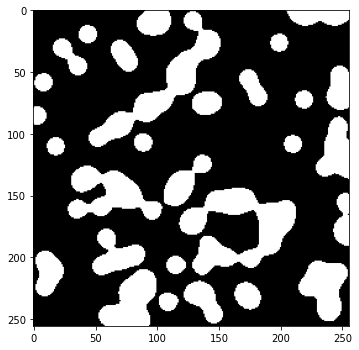

In [ ]:
from skimage import data, measure
import skimage as sk 
import matplotlib.pyplot as plt

blobs = data.binary_blobs(length=256, blob_size_fraction=0.1,volume_fraction=0.3)
IG = sk.color.rgb2gray(blobs) 

fig = plt.figure(figsize=(5,5))
plt.imshow(IG,cmap='gray')
plt.tight_layout()
plt.show()

Segmentem, etiquetem regions i visualitzem:

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


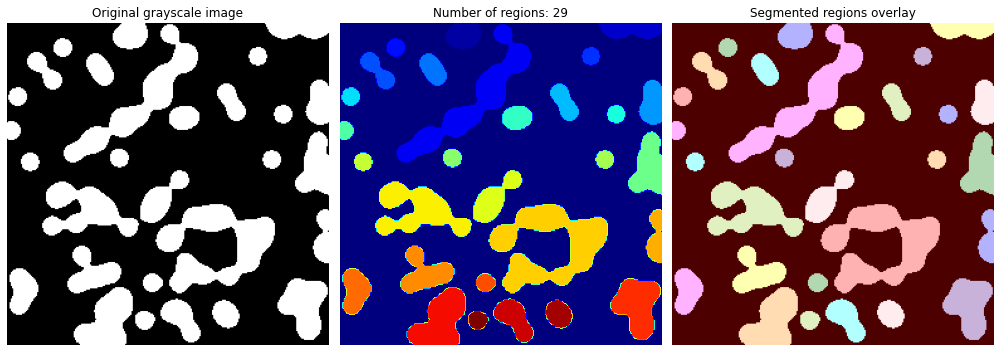

In [ ]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image') 
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay') 

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

Obtenir les propietats en forma de pandas dataframe

In [ ]:
import pandas as pd

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent'])

df_propietats = pd.DataFrame(props)
df_propietats.head()


,label,area,eccentricity,extent
0,1,487,0.673992,0.828231
1,2,543,0.969476,0.819005
2,3,2616,0.973926,0.222260
3,4,177,0.184357,0.786667
4,5,170,0.150418,0.755556


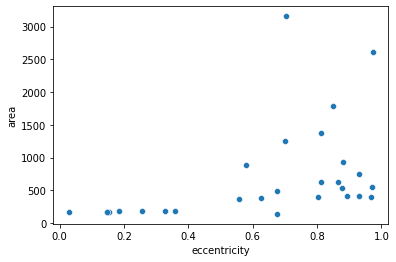

In [ ]:
import seaborn as sns

sns.scatterplot(x='eccentricity',y='area',data=df_propietats)